# Project: flower specie prediction model using SVM
By: odubajo abdul qoyyum
## Table of Contents
<ul>
    <li><a href="#assessing">Data Wrangling</a></li>  
    <li><a href="#analysis">EDA</a></li>
    <li><a href="#conclusion">data preparation and model building

### Import all packages and set plots to be embedded inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Wrangling

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['target'] = iris.target

In [6]:
iris_df['flower_name'] =iris_df.target.apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


###  Exploratory Data Analysis

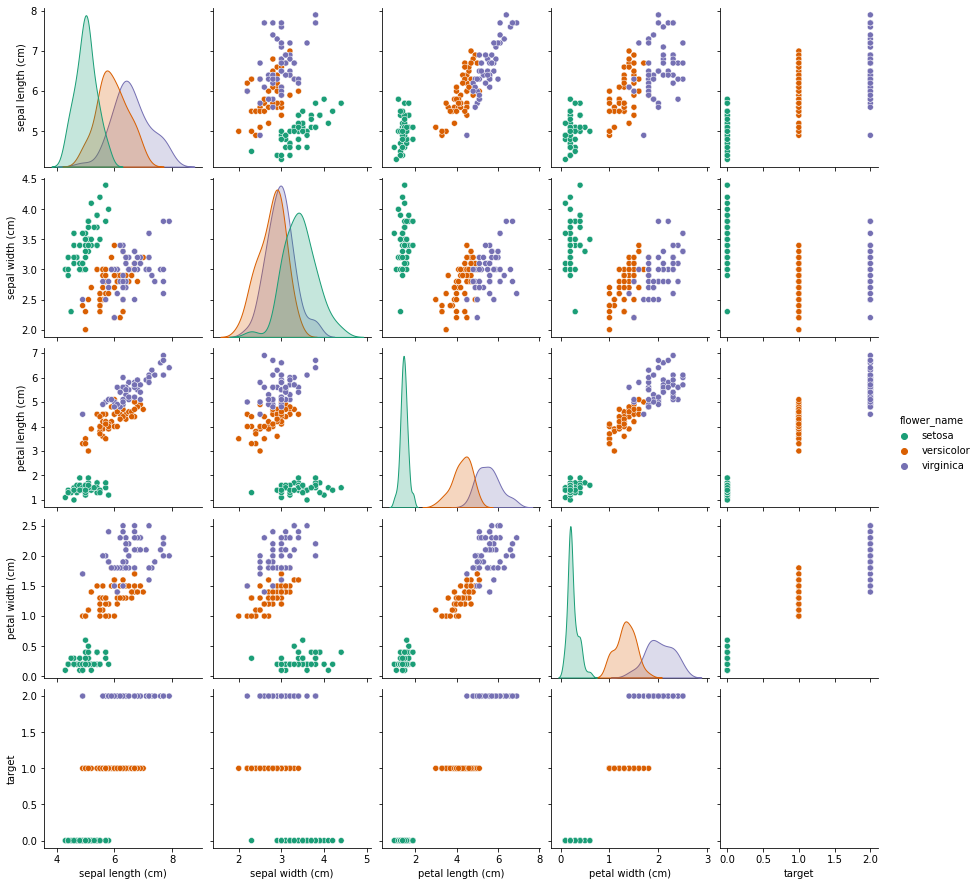

In [7]:
# Setosa is the most separable. 
sns.pairplot(iris_df,hue='flower_name', palette='Dark2')

### Model Building using SVM

###### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score

In [9]:
X = iris_df.drop('flower_name',axis=1)
y = iris_df['flower_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
from sklearn.svm import SVC

In [11]:
svc_model = SVC()

##### training the model

In [12]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [13]:
cross_val_score(svc_model, X_train,y_train, cv= skf, scoring= 'accuracy')

array([1., 1., 1., 1., 1.])

In [14]:
svc_model.fit(X_train,y_train)

SVC()

In [15]:
predictions = svc_model.predict(X_test)

### Model Evaluation

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### parameter tuning using gridsearch

In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
#creating a dictionary of the parameter values

param_dict = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

###### fitting grid search on the data

In [23]:

grid = GridSearchCV(SVC(),param_dict,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [32]:
# taking a look at the best parameter after tuning

grid.best_params_

{'C': 0.1, 'gamma': 1}

In [25]:
grid_predict = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test,grid_predict))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]


In [29]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

